In [1]:
import sys
sys.path.append('..')

In [25]:
import pandas as pd
import sqlite3
import seaborn as sns

In [4]:
conn = sqlite3.connect(r"D:\Outer Loop Consulting\SMP2022 - General\models\r.sqlite")

In [7]:
df = pd.read_sql("Select * from benchmarking", conn).drop(columns=["index"])
df

,Project,Select_Link,queries,queries_size,Minimum_Runtime,cores
0,chicago_sketch,0,0,0.0,1.006726,32
1,chicago_sketch,1,1,1.0,1.055222,32
2,chicago_sketch,1,2,1.0,1.140734,32
3,chicago_sketch,1,3,1.0,1.150171,32
4,chicago_sketch,1,4,1.0,1.176875,32
...,...,...,...,...,...,...
331,chicago_sketch,1,16,1.0,11.923335,1
332,chicago_sketch,1,17,1.0,11.901735,1
333,chicago_sketch,1,18,1.0,11.912699,1
334,chicago_sketch,1,19,1.0,11.945030,1


In [53]:
tbl = df.pivot_table(values="Minimum_Runtime", index="queries", columns="cores")
tbl = tbl/tbl.min()


cores,1,4,8,12,16,24,32
queries,,,,,,,
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.462407,1.413666,1.232994,1.310932,1.217927,1.085260,1.048172
2,1.464085,1.404955,1.255590,1.316700,1.213203,1.018420,1.133112
3,1.469391,1.430066,1.293644,1.350968,1.245403,1.032830,1.142486
4,1.474144,1.455661,1.314508,1.360710,1.284760,1.151135,1.169011
5,1.477753,1.450831,1.323902,1.407695,1.309045,1.166003,1.197555
6,1.493797,1.469390,1.362013,1.480517,1.340099,1.174955,1.224555
7,1.489905,1.495619,1.374815,1.481361,1.362708,1.244059,1.245359
8,1.492410,1.518473,1.399293,1.543318,1.387926,1.279441,1.295382


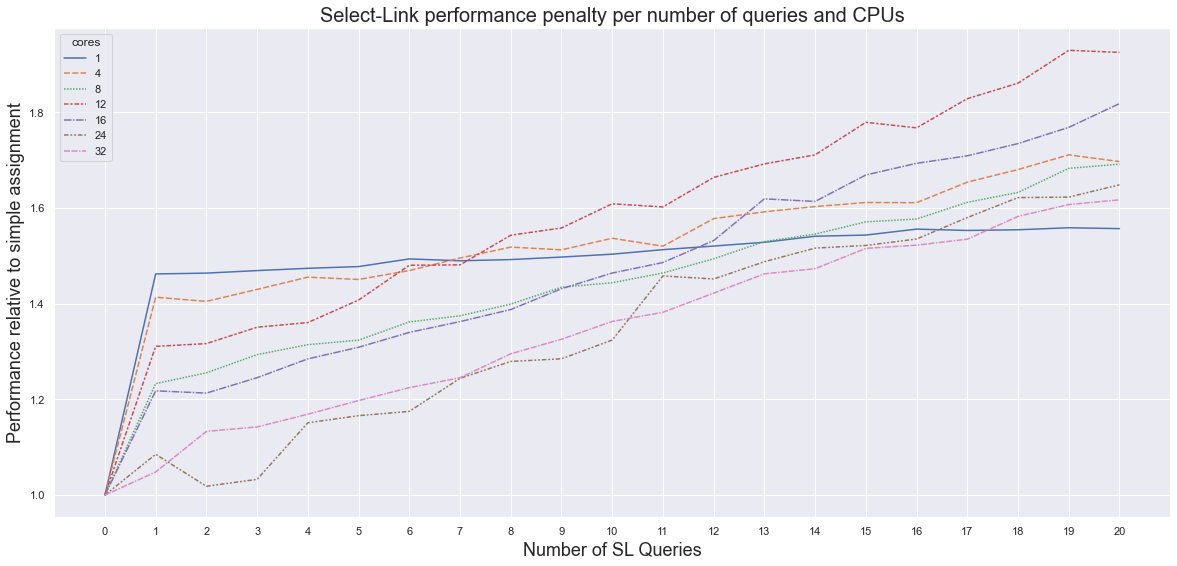

In [56]:
import matplotlib.pyplot as plt


sns.set(rc={'figure.figsize':(20,9)})
ax = sns.lineplot(data=tbl[[1, 4, 8, 12, 16, 24, 32]], legend="full")
plt.xticks(range(0,21))

plt.xlabel('Number of SL Queries', fontsize=18)
plt.ylabel('Performance relative to simple assignment', fontsize=18)
ax.set_title('Select-Link performance penalty per number of queries and CPUs', fontsize=20)
# fig = plt.figure().suptitle('test title', fontsize=20)

# ax.set(title='Select-Link performance penalty per number of queries')
plt.rcParams["axes.titlesize"] = 20

plt.savefig("D:/test.png",dpi=400)

In [47]:
help(plt.savefig)

Help on function savefig in module matplotlib.pyplot:

savefig(*args, **kwargs)
    Save the current figure.
    
    Call signature::
    
      savefig(fname, *, dpi='figure', format=None, metadata=None,
              bbox_inches=None, pad_inches=0.1,
              facecolor='auto', edgecolor='auto',
              backend=None, **kwargs
             )
    
    The available output formats depend on the backend being used.
    
    Parameters
    ----------
    fname : str or path-like or binary file-like
        A path, or a Python file-like object, or
        possibly some backend-dependent object such as
        `matplotlib.backends.backend_pdf.PdfPages`.
    
        If *format* is set, it determines the output format, and the file
        is saved as *fname*.  Note that *fname* is used verbatim, and there
        is no attempt to make the extension, if any, of *fname* match
        *format*, and no extension is appended.
    
        If *format* is not set, then the format is inf

In [8]:
from aequilibrae.matrix import AequilibraeMatrix
import numpy as np

In [3]:
mat = AequilibraeMatrix()
mat.load('D:/distance_skim.omx')

In [4]:
mat.computational_view()

In [18]:
np.nansum(mat.matrix_view)

5389509583715928.0

In [6]:
mat2 = AequilibraeMatrix()

In [10]:
mat2.create_empty(file_name='D:/mat.aem',
                         zones=mat.zones,
                         matrix_names= mat.names,
                         data_type=np.float32)

In [14]:
mat2.distance[:, :] = mat.matrix_view[:, :]

In [22]:
mat2.index[:] = mat.index[:]

In [19]:
np.nansum(mat2.distance)

5389229400000000.0

In [24]:
mat2.save()